# Nobel Laureates

Analysis of data on Nobel Laureates scraped from nobelprize.org and available from Kaggle.com: https://www.kaggle.com/nobelfoundation/nobel-laureates


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.0f}'.format

Taking a peek at the first row of the data:

In [3]:
!head -n 1 archive.csv

Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country


In [4]:
nobeldf = pd.read_csv("archive.csv", parse_dates = ["Birth Date", "Death Date"])

In [5]:
nobeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              881 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              969 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
Death City              599 non-null object
Death Country           605 non-null object
dtypes: datetime64[ns](1), int64(2), object(15)
memory usage: 136.3+ KB


*** The Birth Date didn't get converted to datetime because of missing values. ***

In [6]:
nobeldf.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


Index columns that we are going to need for the next few lines of code:

In [7]:
nobeldf["Laureate Type"].value_counts()

Individual      939
Organization     30
Name: Laureate Type, dtype: int64

### Missing data

From above, we can see that there are missing data such as "Sex", "Organization Name", "Organization Country", and "Death Date".

### How many categories and how are they distributed?

In [8]:
nobeldf.Category.value_counts()

Medicine      227
Physics       222
Chemistry     194
Peace         130
Literature    113
Economics      83
Name: Category, dtype: int64

In [9]:
sns.set(style="white")

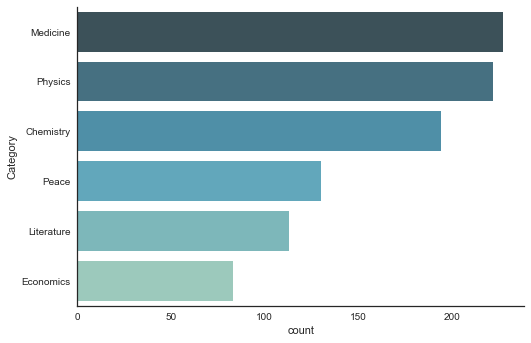

In [10]:
sns.countplot(y='Category', data= nobeldf, 
              order=nobeldf.Category.value_counts().index,
              palette='GnBu_d')
sns.despine();
plt.savefig('category.png')

In [11]:
!open 'category.png'

## Males vs. Females

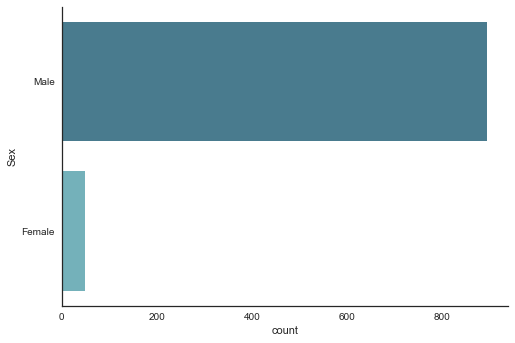

In [12]:
sns.countplot(y="Sex", data=nobeldf,
             palette='GnBu_d');
sns.despine()
plt.savefig('sex.png')

In [13]:
!open 'sex.png'

## Nobel Laureates by Organization Country

In [30]:
nobeldf["Organization Country"].value_counts()

United States of America             363
United Kingdom                        91
Germany                               51
France                                40
Federal Republic of Germany           26
                                    ... 
Finland                                1
Alsace (then Germany, now France)      1
Ireland                                1
Czechoslovakia                         1
Hungary                                1
Name: Organization Country, dtype: int64

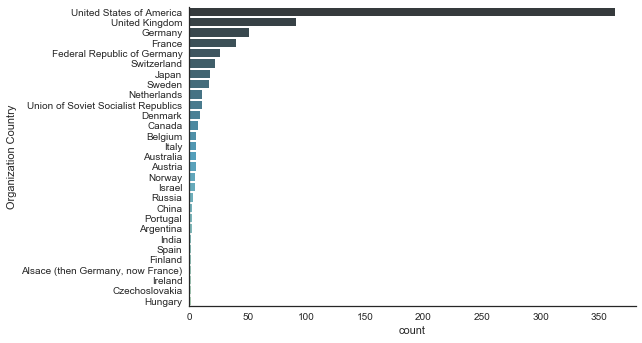

In [14]:
sns.set(style='white')
sns.countplot(y='Organization Country',
              data=nobeldf,
              order=nobeldf['Organization Country'].value_counts().index,
              palette='GnBu_d')
sns.despine()
plt.savefig('countries.png')

## Nobel Laureates by Birth Country

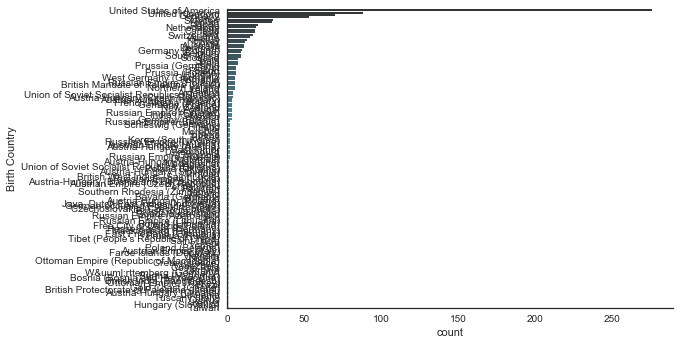

In [15]:
sns.countplot(y='Birth Country',
              data=nobeldf,
              order=nobeldf['Birth Country'].value_counts().index,
              palette='GnBu_d')
sns.despine()
plt.savefig('birth.png')

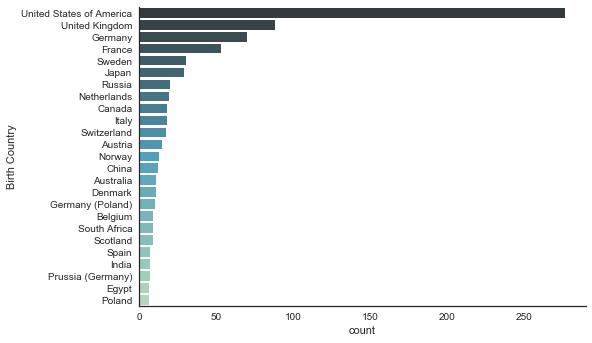

In [16]:
sns.countplot(y='Birth Country',
              data=nobeldf,
              order=nobeldf['Birth Country'].value_counts().index[:25],
              palette='GnBu_d')
sns.despine()
plt.savefig('birthtop25.png')

In [77]:
nobeldf["Birth Country"].value_counts()

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
                           ... 
Tuscany (Italy)               1
Cyprus                        1
Kenya                         1
Hungary (Slovakia)            1
Taiwan                        1
Name: Birth Country, dtype: int64

## Age of nobel laureates (at the time of award)

- Calculate the age using "Year" and "Birth Date"

But there are missing values in "Birth Year".

In [17]:
nobeldf["Birth Date"].value_counts().head()

nan           29
1952-11-09     3
1938-03-07     3
1881-03-23     3
1930-03-15     3
Name: Birth Date, dtype: int64

--> Replace "nan" with 0s:

In [18]:
nobeldf = nobeldf.replace(to_replace = "nan", value=0)

Create new column, "Birth Year":

In [19]:
nobeldf["Birth Year"] = nobeldf["Birth Date"].str[0:4]

In [20]:
nobeldf['Birth Year'].head()

0    1852
1    1839
2    1854
3    1828
4    1822
Name: Birth Year, dtype: object

In [21]:
nobeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 19 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              881 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              969 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
Death City              599 non-null object
Death Country           605 non-null object
Birth Year              940 non-null object
dtypes: datetime64[ns](1), int64(2), object(16)
memor

Convert "Birth Year" column from str to numeric:

In [22]:
nobeldf["Birth Year"] = pd.to_numeric(nobeldf["Birth Year"])

In [23]:
nobeldf["Birth Year"].head()

0   1,852
1   1,839
2   1,854
3   1,828
4   1,822
Name: Birth Year, dtype: float64

In [24]:
nobeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 19 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              881 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              969 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
Death City              599 non-null object
Death Country           605 non-null object
Birth Year              940 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), obj

Calculation of age during awarding of Nobel:

In [25]:
nobeldf["Age"] = nobeldf["Year"] - nobeldf["Birth Year"]

In [26]:
nobeldf.Age.value_counts().head()

61    35
63    34
64    34
56    33
54    33
Name: Age, dtype: int64

In [27]:
nobeldf.Age.describe()

count   940
mean     59
std      12
min      17
25%      50
50%      60
75%      69
max      90
Name: Age, dtype: float64

#### Distribution of age of Nobel Prize awardees

/Users/alonavarshal/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


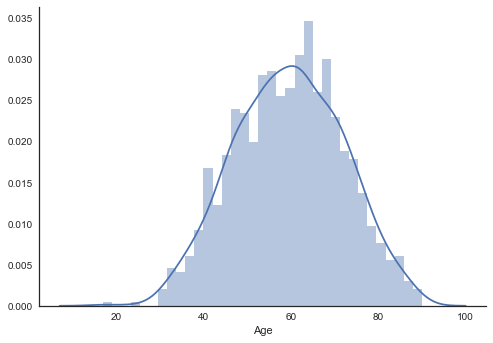

In [28]:
sns.distplot(nobeldf["Age"].dropna(), bins=35)
sns.set(style='white')
sns.despine();

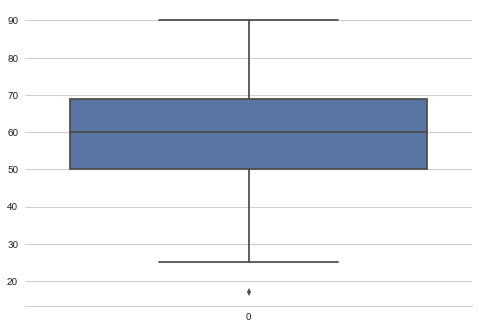

In [29]:
sns.set_style("whitegrid")
sns.boxplot(data=nobeldf.Age)
sns.despine(left=True)

## You are most likely to be awarded a Nobel Prize if you are:

1. a male
2. in the area of medicine
3. living in the USA
4. around 60 years old

## Number of Nobel laureates per category in each country:

In [31]:
sp = nobeldf.groupby("Organization Country")["Category"].value_counts().sort_values(ascending=False)

In [32]:
sp

Organization Country               Category 
United States of America           Medicine     112
                                   Physics      104
                                   Chemistry     79
                                   Economics     65
United Kingdom                     Medicine      31
                                               ... 
Italy                              Chemistry      1
Hungary                            Medicine       1
India                              Physics        1
Ireland                            Physics        1
Alsace (then Germany, now France)  Physics        1
Name: Category, dtype: int64

In [33]:
spunstack = sp.unstack("Category")

In [34]:
spunstack

Category,Chemistry,Economics,Medicine,Peace,Physics
Organization Country,,,,,
"Alsace (then Germany, now France)",nan,nan,nan,nan,1
Argentina,1,nan,1,nan,nan
Australia,nan,nan,5,nan,1
Austria,1,nan,4,nan,1
Belgium,1,nan,4,nan,1
...,...,...,...,...,...
Sweden,5,1,7,nan,4
Switzerland,6,nan,8,nan,8
Union of Soviet Socialist Republics,1,1,nan,nan,9


### Why is there no literature???

In [35]:
literature = nobeldf.loc[nobeldf["Category"] == "Literature"]

In [36]:
literature["Organization Country"].value_counts()

Series([], Name: Organization Country, dtype: int64)

It looks like the Organization Country values are missing for Literature.

In [37]:
literature.columns

Index(['Year', 'Category', 'Prize', 'Motivation', 'Prize Share', 'Laureate ID',
       'Laureate Type', 'Full Name', 'Birth Date', 'Birth City',
       'Birth Country', 'Sex', 'Organization Name', 'Organization City',
       'Organization Country', 'Death Date', 'Death City', 'Death Country',
       'Birth Year', 'Age'],
      dtype='object')

In [38]:
literature["Birth Country"].value_counts()

France                              11
United States of America             9
Sweden                               7
United Kingdom                       6
Spain                                5
                                    ..
Schleswig (Germany)                  1
Free City of Danzig (Poland)         1
Portugal                             1
Austria-Hungary (Czech Republic)     1
Hungary                              1
Name: Birth Country, dtype: int64

In [39]:
literature[literature["Birth Country"] == "United States of America"]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Birth Year,Age
153,1930,Literature,The Nobel Prize in Literature 1930,"""for his vigorous and graphic art of descripti...",1/1,603,Individual,Sinclair Lewis,1885-02-07,"Sauk Centre, MN",United States of America,Male,NaN,NaN,NaN,1951-01-10,Rome,Italy,"1,885",45
189,1936,Literature,The Nobel Prize in Literature 1936,"""for the power, honesty and deep-felt emotions...",1/1,608,Individual,Eugene Gladstone O'Neill,1888-10-16,"New York, NY",United States of America,Male,NaN,NaN,NaN,1953-11-27,"Boston, MA",United States of America,"1,888",48
204,1938,Literature,The Nobel Prize in Literature 1938,"""for her rich and truly epic descriptions of p...",1/1,610,Individual,Pearl Buck,1892-06-26,"Hillsboro, WV",United States of America,Female,NaN,NaN,NaN,1973-03-06,"Danby, VT",United States of America,"1,892",46
248,1948,Literature,The Nobel Prize in Literature 1948,"""for his outstanding, pioneer contribution to ...",1/1,619,Individual,Thomas Stearns Eliot,1888-09-26,"St. Louis, MO",United States of America,Male,NaN,NaN,NaN,1965-01-04,London,United Kingdom,"1,888",60
252,1949,Literature,The Nobel Prize in Literature 1949,"""for his powerful and artistically unique cont...",1/1,620,Individual,William Faulkner,1897-09-25,"New Albany, MS",United States of America,Male,NaN,NaN,NaN,1962-07-06,"Byhalia, MS",United States of America,"1,897",52
290,1954,Literature,The Nobel Prize in Literature 1954,"""for his mastery of the art of narrative, most...",1/1,625,Individual,Ernest Miller Hemingway,1899-07-21,"Oak Park, IL",United States of America,Male,NaN,NaN,NaN,1961-07-02,"Ketchum, ID",United States of America,"1,899",55
353,1962,Literature,The Nobel Prize in Literature 1962,"""for his realistic and imaginative writings, c...",1/1,634,Individual,John Steinbeck,1902-02-27,"Salinas, CA",United States of America,Male,NaN,NaN,NaN,1968-12-20,"New York, NY",United States of America,"1,902",60
654,1993,Literature,The Nobel Prize in Literature 1993,"""who in novels characterized by visionary forc...",1/1,670,Individual,Toni Morrison,1931-02-18,"Lorain, OH",United States of America,Female,NaN,NaN,NaN,NaT,NaN,NaN,"1,931",62
963,2016,Literature,The Nobel Prize in Literature 2016,"""for having created new poetic expressions wit...",1/1,937,Individual,Bob Dylan,1941-05-24,"Duluth, MN",United States of America,Male,NaN,NaN,NaN,NaT,NaN,NaN,"1,941",75


### Birth Country and Category

In [103]:
birthcountry_category = nobeldf.groupby("Birth Country")["Category"].value_counts().sort_values(ascending=False)
birthcountry_category

Birth Country             Category 
United States of America  Medicine     74
                          Physics      70
                          Chemistry    57
                          Economics    47
United Kingdom            Medicine     26
                                       ..
Luxembourg                Medicine      1
Lithuania                 Chemistry     1
Korea (South Korea)       Peace         1
                          Chemistry     1
Japan                     Peace         1
Name: Category, dtype: int64

In [104]:
birth0 = birthcountry_category.fillna(0)
birth0

Birth Country             Category 
United States of America  Medicine     74
                          Physics      70
                          Chemistry    57
                          Economics    47
United Kingdom            Medicine     26
                                       ..
Luxembourg                Medicine      1
Lithuania                 Chemistry     1
Korea (South Korea)       Peace         1
                          Chemistry     1
Japan                     Peace         1
Name: Category, dtype: int64

In [105]:
birth0.unstack()

Category,Chemistry,Economics,Literature,Medicine,Peace,Physics
Birth Country,,,,,,
Argentina,nan,nan,nan,2,2,nan
Australia,1,nan,nan,8,nan,2
Austria,4,1,1,5,1,3
Austria-Hungary (Austria),2,nan,nan,nan,nan,nan
Austria-Hungary (Bosnia and Herzegovina),1,nan,nan,nan,nan,nan
...,...,...,...,...,...,...
Venezuela,nan,nan,nan,1,nan,nan
Vietnam,nan,nan,nan,nan,1,nan
W&uuml;rttemberg (Germany),nan,nan,nan,1,nan,nan


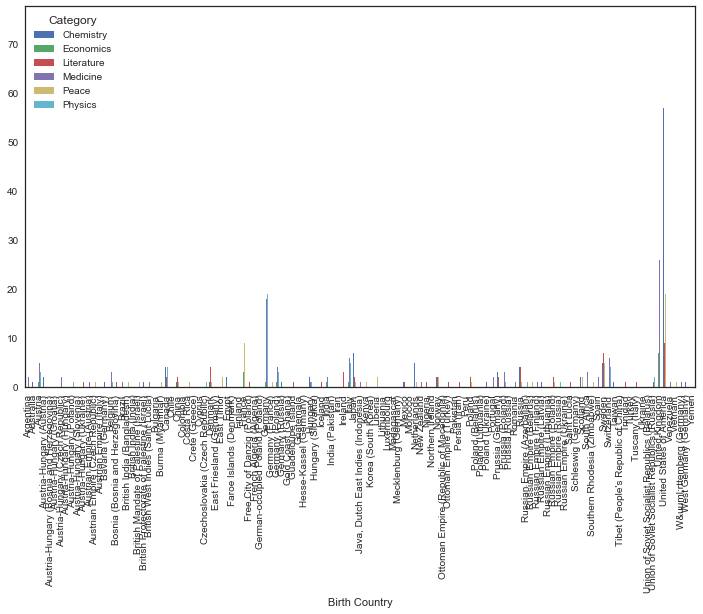

In [106]:
birth0.unstack().plot(kind='bar', figsize=(12, 7))

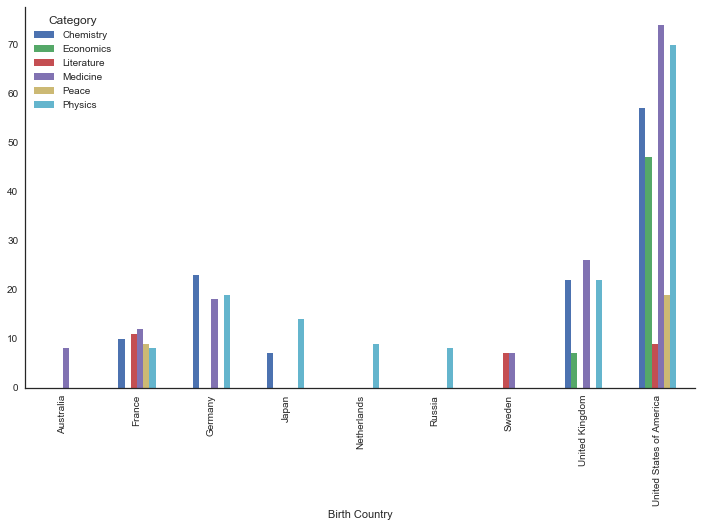

In [108]:
birth0[:25].unstack().plot(kind='bar', figsize=(12, 7))
sns.despine();

In [74]:
birthcountry_category

Birth Country               Category 
Argentina                   Medicine     2
                            Peace        2
Australia                   Medicine     8
                            Physics      2
                            Chemistry    1
                                        ..
Vietnam                     Peace        1
W&uuml;rttemberg (Germany)  Medicine     1
West Germany (Germany)      Physics      4
                            Chemistry    1
Yemen                       Peace        1
Name: Category, dtype: int64

In [75]:
birthcountry_category.unstack().dropna()

Category,Chemistry,Economics,Literature,Medicine,Peace,Physics
Birth Country,,,,,,
Austria,4,1,1,5,1,3
Canada,4,3,2,4,1,4
France,10,3,11,12,9,8
Germany,23,1,4,18,5,19
India,1,1,1,2,1,1
Norway,2,4,2,2,2,1
Russia,4,2,4,1,1,8
Sweden,5,2,7,7,5,4
United Kingdom,22,7,6,26,5,22


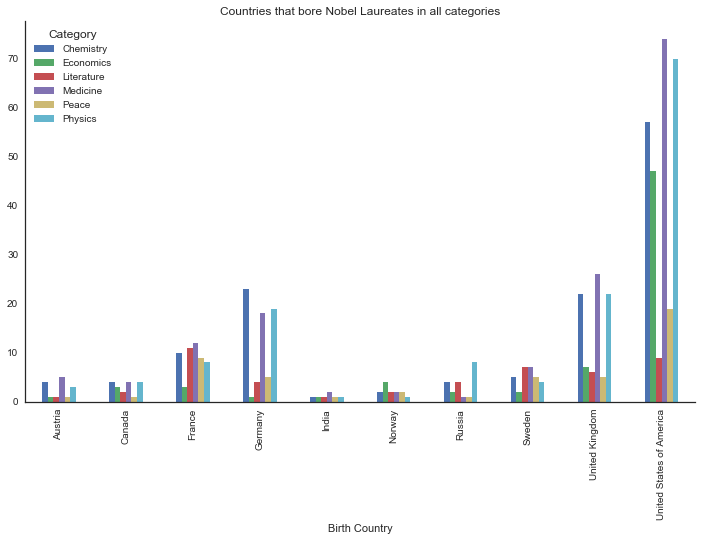

In [110]:
sns.set(style="white")
birthcountry_category.unstack().dropna().plot(kind='bar', figsize=(12, 7), grid=None, title="Countries that bore Nobel Laureates in all categories")
sns.despine();

## Analysis of Motivation Column

In [78]:
nobeldf.Motivation.str.count('\w').describe()

count   881
mean     84
std      35
min      18
25%      57
50%      80
75%     105
max     279
Name: Motivation, dtype: float64

In [79]:
chemistry = nobeldf[nobeldf.Category == "Chemistry"]

In [80]:
chemistry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 960
Data columns (total 20 columns):
Year                    194 non-null int64
Category                194 non-null object
Prize                   194 non-null object
Motivation              194 non-null object
Prize Share             194 non-null object
Laureate ID             194 non-null int64
Laureate Type           194 non-null object
Full Name               194 non-null object
Birth Date              194 non-null object
Birth City              194 non-null object
Birth Country           194 non-null object
Sex                     194 non-null object
Organization Name       192 non-null object
Organization City       188 non-null object
Organization Country    189 non-null object
Death Date              122 non-null datetime64[ns]
Death City              119 non-null object
Death Country           119 non-null object
Birth Year              193 non-null float64
Age                     193 non-null float64
dtypes:

In [81]:
chemistry.Motivation.str.count('\w').describe()

count   194
mean     75
std      33
min      23
25%      52
50%      66
75%      94
max     192
Name: Motivation, dtype: float64

In [82]:
chemistry.Motivation

0      "in recognition of the extraordinary services ...
6      "in recognition of the extraordinary services ...
13     "in recognition of the extraordinary services ...
20     "in recognition of his services in the discove...
26     "in recognition of his services in the advance...
                             ...                        
948              "for mechanistic studies of DNA repair"
949              "for mechanistic studies of DNA repair"
958    "for the design and synthesis of molecular mac...
959    "for the design and synthesis of molecular mac...
960    "for the design and synthesis of molecular mac...
Name: Motivation, dtype: object

In [83]:
allmotivation = ' '.join(chemistry.Motivation)

In [84]:
import wordcloud

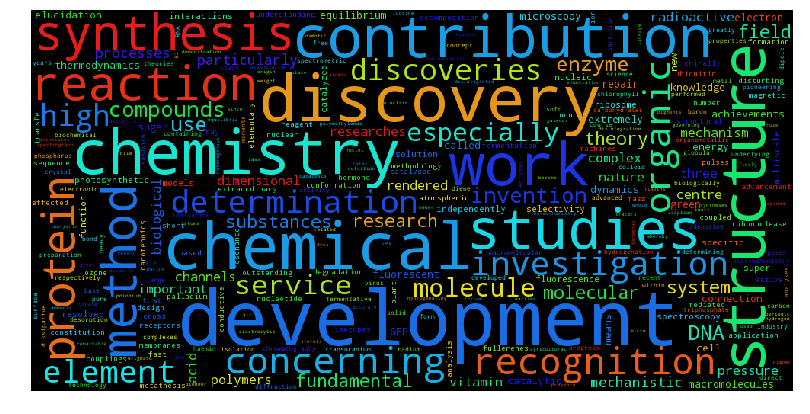

In [85]:
cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=300,
                            relative_scaling=.5).generate(allmotivation)
plt.figure(figsize=(16, 7))
plt.axis('off')
plt.savefig('chemistrynobel.png')
plt.imshow(cloud);

In [54]:
!open chemistrynobel.png

wordcloud for all categories

In [86]:
nobelmotivation = ' '.join(nobeldf.Motivation.dropna())

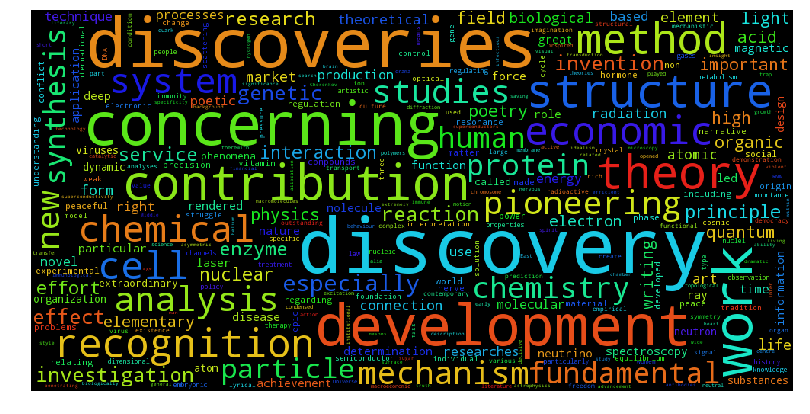

In [87]:
cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=300,
                            relative_scaling=.5).generate(nobelmotivation)
plt.figure(figsize=(16, 7))
plt.axis('off')
plt.savefig('chemistrynobel.png')
plt.imshow(cloud);

## Analysis of Prize Share column

In [88]:
nobeldf["Prize Share"].describe()

count     969
unique      4
top       1/1
freq      351
Name: Prize Share, dtype: object

### Obtaining csv files to use in creating a map of the data

In [89]:
countries = nobeldf["Organization Country"].unique()

In [90]:
countries

array(['Germany', nan, 'United Kingdom', 'Netherlands', 'Sweden',
       'Denmark', 'France', 'Russia', 'Italy', 'Spain',
       'United States of America', 'Switzerland',
       'Alsace (then Germany, now France)', 'Austria', 'Belgium', 'Canada',
       'India', 'Hungary', 'Finland', 'Argentina', 'Portugal', 'Japan',
       'Federal Republic of Germany', 'Ireland',
       'Union of Soviet Socialist Republics', 'Czechoslovakia',
       'Australia', 'Norway', 'Israel', 'China'], dtype=object)

Countries printed to copy and paste on geocoder:

http://www.gpsvisualizer.com/geocoder/

In [91]:
for country in countries:
    print(country)

Germany
nan
United Kingdom
Netherlands
Sweden
Denmark
France
Russia
Italy
Spain
United States of America
Switzerland
Alsace (then Germany, now France)
Austria
Belgium
Canada
India
Hungary
Finland
Argentina
Portugal
Japan
Federal Republic of Germany
Ireland
Union of Soviet Socialist Republics
Czechoslovakia
Australia
Norway
Israel
China


Geocodes saved into a csv file (using sublime) and read to pandas below:

In [92]:
countryloc = pd.read_csv("countryloc.csv")

In [93]:
countryloc

,latitude,longitude,name,desc,color,source,precision
0,-35,-65,Argentina,AR,nan,MapQuest Open,country
1,-25,135,Australia,AU,nan,MapQuest Open,country
2,47,13,Austria,AT,nan,MapQuest Open,country
3,51,5,Belgium,BE,nan,MapQuest Open,country
4,61,-108,Canada,CA,nan,MapQuest Open,country
...,...,...,...,...,...,...,...
21,40,-4,Spain,ES,nan,MapQuest Open,country
22,60,15,Sweden,SE,nan,MapQuest Open,country
23,47,8,Switzerland,CH,nan,MapQuest Open,country
24,55,-3,United Kingdom,GB,nan,MapQuest Open,country


In [94]:
countryloc["Organization Country"] = countryloc.name

In [95]:
countryloc

,latitude,longitude,name,desc,color,source,precision,Organization Country
0,-35,-65,Argentina,AR,nan,MapQuest Open,country,Argentina
1,-25,135,Australia,AU,nan,MapQuest Open,country,Australia
2,47,13,Austria,AT,nan,MapQuest Open,country,Austria
3,51,5,Belgium,BE,nan,MapQuest Open,country,Belgium
4,61,-108,Canada,CA,nan,MapQuest Open,country,Canada
...,...,...,...,...,...,...,...,...
21,40,-4,Spain,ES,nan,MapQuest Open,country,Spain
22,60,15,Sweden,SE,nan,MapQuest Open,country,Sweden
23,47,8,Switzerland,CH,nan,MapQuest Open,country,Switzerland
24,55,-3,United Kingdom,GB,nan,MapQuest Open,country,United Kingdom


In [96]:
countryloc2 = countryloc[["Organization Country", "longitude", "latitude"]]

In [97]:
countryloc2

,Organization Country,longitude,latitude
0,Argentina,-65,-35
1,Australia,135,-25
2,Austria,13,47
3,Belgium,5,51
4,Canada,-108,61
...,...,...,...
21,Spain,-4,40
22,Sweden,15,60
23,Switzerland,8,47
24,United Kingdom,-3,55


Merging the data

In [98]:
spdfloc = pd.merge(spdf, countryloc2, on="Organization Country", how="outer")

NameError: name 'spdf' is not defined

In [111]:
spdfloc.loc[spdfloc["Organization Country"] == "Russia"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
22,Russia,nan,nan,1,nan,2,98,65


In [112]:
spdfloc.loc[spdfloc["Organization Country"] == "Union of Soviet Socialist Republics"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
26,Union of Soviet Socialist Republics,1,1,nan,nan,9,nan,nan


In [124]:
spdfloc.loc[spdfloc["Organization Country"]=="Russia", ["latitude", "longitude"]]

,latitude,longitude
22,65,98


In [115]:
spdfloc2 = spdfloc

In [125]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "latitude"] = spdfloc.loc[spdfloc["Organization Country"]=="Russia", "latitude"] 

In [128]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "latitude"]

26   nan
Name: latitude, dtype: float64

In [138]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "latitude"] = 65

In [139]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "latitude"]

26   65
Name: latitude, dtype: float64

In [140]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "longitude"] = 98

In [133]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "latitude"] = spdfloc.loc[spdfloc["Organization Country"]=="Russia", "latitude"]

In [141]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "latitude"]

26   65
Name: latitude, dtype: float64

In [142]:
spdfloc.loc[spdfloc["Organization Country"]=="Russia", "latitude"]

22   65
Name: latitude, dtype: float64

In [143]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Russia", ["latitude", "longitude"]]

,latitude,longitude
22,65,98


In [144]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", ["latitude", "longitude"]]

,latitude,longitude
26,65,98


In [87]:
spdfloc.loc[spdfloc["Organization Country"] == "Federal Republic of Germany"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
9,Federal Republic of Germany,11,1,7,nan,7,nan,nan


In [88]:
spdfloc.loc[spdfloc["Organization Country"] == "Germany"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
12,Germany,27,nan,10,nan,14,10,51


In [145]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Federal Republic of Germany", "longitude"] = 10

In [146]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Federal Republic of Germany", "latitude"] = 51

In [147]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Federal Republic of Germany", ["longitude", "latitude"]] 

,longitude,latitude
9,10,51


In [89]:
spdfloc.loc[spdfloc["Organization Country"] == "France"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
11,France,11,2,10,1,16,2,47


In [90]:
spdfloc.loc[spdfloc["Organization Country"] == "Alsace (then Germany, now France)"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
0,"Alsace (then Germany, now France)",nan,nan,nan,nan,1,nan,nan


In [148]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Alsace (then Germany, now France)", "longitude"] = 2

In [149]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Alsace (then Germany, now France)", "latitude"] = 47

In [150]:
spdfloc.loc[spdfloc["Organization Country"] == "Alsace (then Germany, now France)"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
0,"Alsace (then Germany, now France)",nan,nan,nan,nan,1,2,47


In [151]:
spdfloc2

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
0,"Alsace (then Germany, now France)",nan,nan,nan,nan,1,2,47
1,Argentina,1,nan,1,nan,nan,-65,-35
2,Australia,nan,nan,5,nan,1,135,-25
3,Austria,1,nan,4,nan,1,13,47
4,Belgium,1,nan,4,nan,1,5,51
...,...,...,...,...,...,...,...,...
24,Sweden,5,1,7,nan,4,15,60
25,Switzerland,6,nan,8,nan,8,8,47
26,Union of Soviet Socialist Republics,1,1,nan,nan,9,98,65
27,United Kingdom,28,6,31,nan,26,-3,55


In [152]:
spdfloc2 = spdfloc2.fillna(0)

In [153]:
spdfloc2

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
0,"Alsace (then Germany, now France)",0,0,0,0,1,2,47
1,Argentina,1,0,1,0,0,-65,-35
2,Australia,0,0,5,0,1,135,-25
3,Austria,1,0,4,0,1,13,47
4,Belgium,1,0,4,0,1,5,51
...,...,...,...,...,...,...,...,...
24,Sweden,5,1,7,0,4,15,60
25,Switzerland,6,0,8,0,8,8,47
26,Union of Soviet Socialist Republics,1,1,0,0,9,98,65
27,United Kingdom,28,6,31,0,26,-3,55


In [155]:
spdfloc2.to_csv("nobellistloc.csv")

In [1]:
import pandas as pd

In [2]:
spdfloc3 = pd.read_csv("nobellistloc.csv")

In [3]:
spdfloc3

,Unnamed: 0,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
0,0,"Alsace (then Germany, now France)",0.0,0.0,0.0,0.0,1.0,2.000000,47.000000
1,1,Argentina,1.0,0.0,1.0,0.0,0.0,-65.241974,-35.112487
2,2,Australia,0.0,0.0,5.0,0.0,1.0,134.755000,-24.776109
3,3,Austria,1.0,0.0,4.0,0.0,1.0,13.199959,47.200034
4,4,Belgium,1.0,0.0,4.0,0.0,1.0,4.666960,50.640735
5,5,Canada,3.0,0.0,2.0,0.0,2.0,-107.991707,61.066692
6,6,China,0.0,0.0,1.0,0.0,1.0,104.999927,35.000074
7,7,Czechoslovakia,1.0,0.0,0.0,0.0,0.0,-100.445882,39.783730
8,8,Denmark,1.0,1.0,4.0,0.0,3.0,10.333328,55.670249
9,9,Federal Republic of Germany,11.0,1.0,7.0,0.0,7.0,10.000000,51.000000


In [4]:
del spdfloc3["Unnamed: 0"]

In [5]:
spdfloc3

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
0,"Alsace (then Germany, now France)",0.0,0.0,0.0,0.0,1.0,2.000000,47.000000
1,Argentina,1.0,0.0,1.0,0.0,0.0,-65.241974,-35.112487
2,Australia,0.0,0.0,5.0,0.0,1.0,134.755000,-24.776109
3,Austria,1.0,0.0,4.0,0.0,1.0,13.199959,47.200034
4,Belgium,1.0,0.0,4.0,0.0,1.0,4.666960,50.640735
5,Canada,3.0,0.0,2.0,0.0,2.0,-107.991707,61.066692
6,China,0.0,0.0,1.0,0.0,1.0,104.999927,35.000074
7,Czechoslovakia,1.0,0.0,0.0,0.0,0.0,-100.445882,39.783730
8,Denmark,1.0,1.0,4.0,0.0,3.0,10.333328,55.670249
9,Federal Republic of Germany,11.0,1.0,7.0,0.0,7.0,10.000000,51.000000


In [7]:
spdfloc3["Total"] = spdfloc3["Chemistry"] + spdfloc3["Economics"] + spdfloc3["Physics"] + spdfloc3["Peace"] + spdfloc3["Medicine"]

In [8]:
spdfloc3

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude,Total
0,"Alsace (then Germany, now France)",0.0,0.0,0.0,0.0,1.0,2.000000,47.000000,1.0
1,Argentina,1.0,0.0,1.0,0.0,0.0,-65.241974,-35.112487,2.0
2,Australia,0.0,0.0,5.0,0.0,1.0,134.755000,-24.776109,6.0
3,Austria,1.0,0.0,4.0,0.0,1.0,13.199959,47.200034,6.0
4,Belgium,1.0,0.0,4.0,0.0,1.0,4.666960,50.640735,6.0
5,Canada,3.0,0.0,2.0,0.0,2.0,-107.991707,61.066692,7.0
6,China,0.0,0.0,1.0,0.0,1.0,104.999927,35.000074,2.0
7,Czechoslovakia,1.0,0.0,0.0,0.0,0.0,-100.445882,39.783730,1.0
8,Denmark,1.0,1.0,4.0,0.0,3.0,10.333328,55.670249,9.0
9,Federal Republic of Germany,11.0,1.0,7.0,0.0,7.0,10.000000,51.000000,26.0


In [9]:
spdfloc3.to_csv("nobellist.csv")